In [10]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler, normalize
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
%matplotlib inline
seed = 33

Read:

In [11]:
dataset = pd.read_csv('default of credit card clients.csv')
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,2000,36681,10000,9000,689,679,0


In [12]:
dataset['default payment next month'].value_counts()

0    192
1     57
Name: default payment next month, dtype: int64

array([[<AxesSubplot:title={'center':'default payment next month'}>]],
      dtype=object)

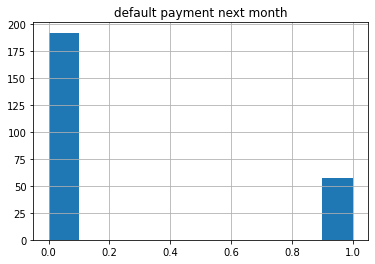

In [13]:
dataset.hist(column='default payment next month')

In [14]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
print(X.shape)
print(y.shape)

(249, 12)
(249,)


In [15]:
over = SMOTE(k_neighbors=10, random_state=7)
X, y = over.fit_resample(X.values, y)
print(X.shape)
print(y.shape)

(384, 12)
(384,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [17]:
X_test[:5]

array([[   118, 280354,      1,      1,      1,     45,   3733,    283,
           107,      0,      0,    216],
       [    34,  50000,      1,      1,      2,     30,   1426,   1034,
           689,    689,    689,    493],
       [   224, 320000,      2,      2,      2,     33,  10042,  18832,
          2117,   2076,   5045,   3754],
       [   214,  30000,      1,      2,      2,     39,   3036,   2309,
             0,   1000,   2000,    148],
       [   102, 380000,      2,      1,      2,     30,    223,  33178,
          1171,   1197,   1250,   5000]])

In [18]:
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (268, 12) (268,)
Test set: (116, 12) (116,)


In [19]:
test_cases = [
    [1,20000,2,2,1,24,0,689,0,0,0,0],
    [2,120000,2,2,2,26,0,1000,1000,1000,0,2000],
    [3,90000,2,2,2,34,1518,1500,1000,1000,1000,5000]
]
expected = [1,1,0]

SVM

In [20]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [21]:
scores = cross_val_score(svc, X, y, cv=3)
print(scores.mean())

0.5729166666666666


In [22]:
y_pred = svc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix is : ", confusion_mat)
recall_show = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall_score is :", recall_show)
precision_show = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision Score is : ", precision_show)

Accuracy: 0.5689655172413793
Confusion matrix is :  [[26 29]
 [21 40]]
Recall_score is : 0.5689655172413793
Precision Score is :  0.5671366444437356


In [23]:
y_prediction_test = svc.predict(test_cases)
print("Predicted: ", y_prediction_test)
print("Expected: ", expected)

Predicted:  [1 1 1]
Expected:  [1, 1, 0]


KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
neigh = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [25]:
scores = cross_val_score(neigh, X, y, cv=3)
print(scores.mean())

0.734375


In [26]:
y_pred = neigh.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix is : ", confusion_mat)
recall_show = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall_score is :", recall_show)
precision_show = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision Score is : ", precision_show)

Accuracy: 0.7586206896551724
Confusion matrix is :  [[35 20]
 [ 8 53]]
Recall_score is : 0.7586206896551724
Precision Score is :  0.7677164921839813


In [27]:
from sklearn.neighbors import RadiusNeighborsClassifier
neigh2 = RadiusNeighborsClassifier(radius=100)
neigh2.fit(X_train, y_train)

RadiusNeighborsClassifier(radius=100)

In [28]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix is : ", confusion_mat)
recall_show = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall_score is :", recall_show)
precision_show = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision Score is : ", precision_show)

Accuracy: 0.7586206896551724
Confusion matrix is :  [[35 20]
 [ 8 53]]
Recall_score is : 0.7586206896551724
Precision Score is :  0.7677164921839813


Minimum error:- 0.2413793103448276 at K = 0


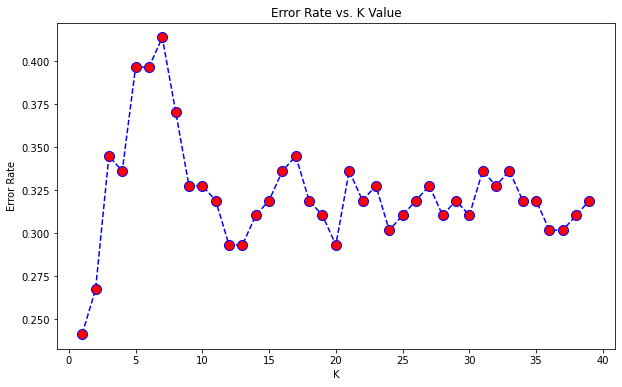

In [29]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7586206896551724 at K = 0


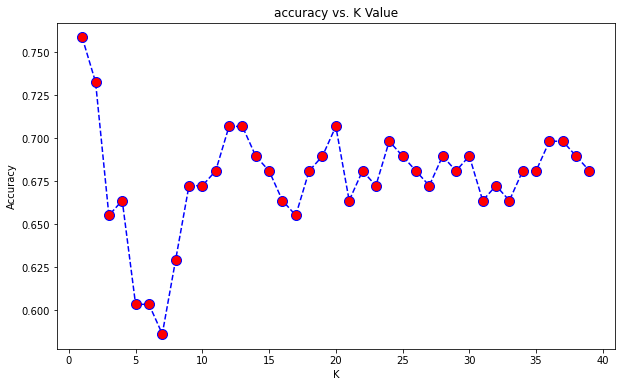

In [30]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Text(0, 0.5, 'Accuracy')

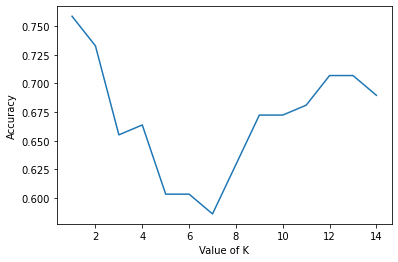

In [31]:
range_k = range(1,15)
scores = {}
scores_list = []

for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(y_test,y_pred)
   scores_list.append(metrics.accuracy_score(y_test,y_pred))
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

Bagging

Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
num_trees = 20
max_features = 3
rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=20)

In [33]:
scores = cross_val_score(rf, X, y, cv=3)
print(scores.mean())

0.5911458333333334


In [34]:
y_pred = rf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix is : ", confusion_mat)
recall_show = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall_score is :", recall_show)
precision_show = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision Score is : ", precision_show)

Accuracy: 0.75
Confusion matrix is :  [[41 14]
 [15 46]]
Recall_score is : 0.75
Precision Score is :  0.7502976190476192


In [35]:
y_prediction_test = rf.predict(test_cases)
print("Predicted: ", y_prediction_test)
print("Expected: ", expected)

Predicted:  [1 0 0]
Expected:  [1, 1, 0]


Minimum error:- 0.16379310344827586 at K = 29


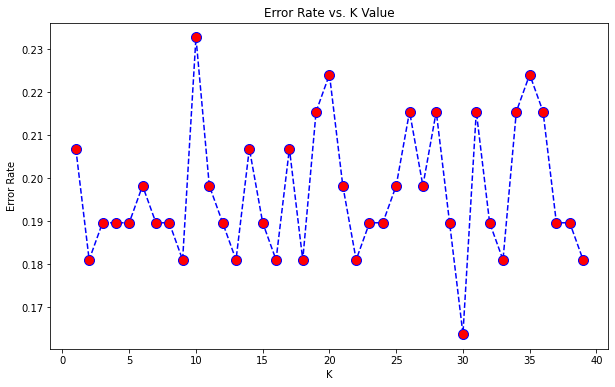

In [36]:
error_rate = []
for i in range(1,40):
 rand = RandomForestClassifier()
 rand.fit(X_train,y_train)
 pred_i = rand.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.853448275862069 at K = 16


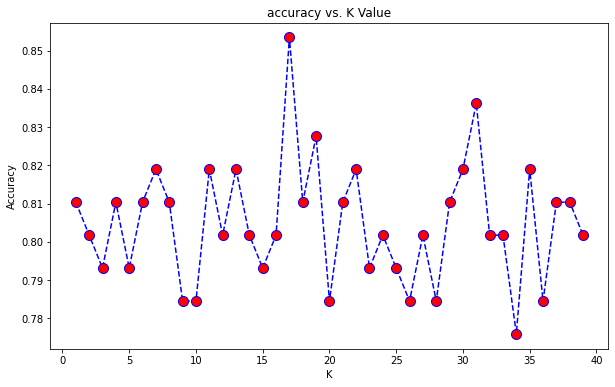

In [37]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    rand = RandomForestClassifier().fit(X_train,y_train)
    yhat = rand.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Bagging Classifier

In [38]:
from sklearn.ensemble import BaggingClassifier
et = BaggingClassifier(n_estimators=10, random_state=seed)
et.fit(X_train, y_train)

BaggingClassifier(random_state=33)

In [39]:
scores = cross_val_score(et, X, y, cv=3)
print(scores.mean())

0.5052083333333334


In [40]:
y_pred = et.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix is : ", confusion_mat)
recall_show = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall_score is :", recall_show)
precision_show = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision Score is : ", precision_show)

Accuracy: 0.7327586206896551
Confusion matrix is :  [[42 13]
 [18 43]]
Recall_score is : 0.7327586206896551
Precision Score is :  0.7356834975369458


In [41]:
y_prediction_test = et.predict(test_cases)
print("Predicted: ", y_prediction_test)
print("Expected: ", expected)

Predicted:  [0 0 0]
Expected:  [1, 1, 0]


Minimum error:- 0.16379310344827586 at K = 9


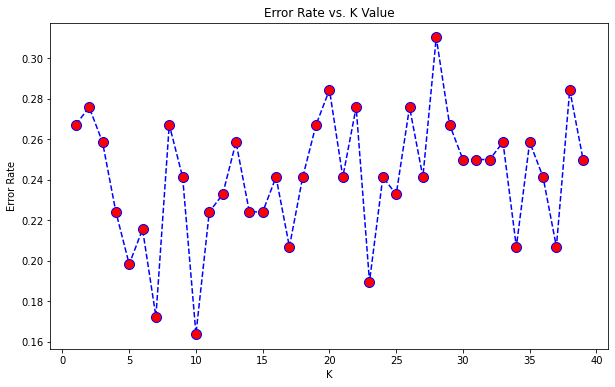

In [42]:
error_rate = []
for i in range(1,40):
 bagging = BaggingClassifier()
 bagging.fit(X_train,y_train)
 pred_i = bagging.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8275862068965517 at K = 18


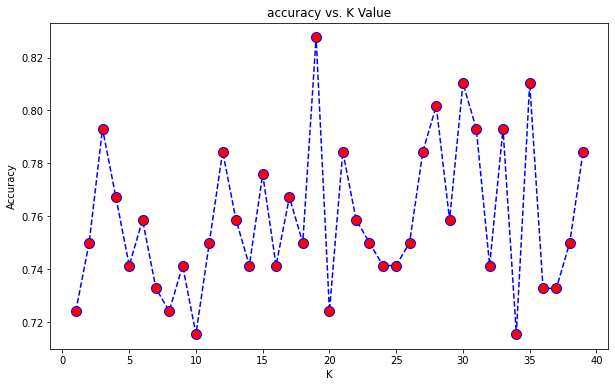

In [43]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    bagg = BaggingClassifier().fit(X_train,y_train)
    yhat = bagg.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Boosting

AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=seed)
ab.fit(X_train, y_train)

AdaBoostClassifier(random_state=33)

In [45]:
scores = cross_val_score(ab, X, y, cv=3)
print(scores.mean())

0.515625


In [46]:
y_pred = ab.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix is : ", confusion_mat)
recall_show = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall_score is :", recall_show)
precision_show = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision Score is : ", precision_show)

Accuracy: 0.6982758620689655
Confusion matrix is :  [[38 17]
 [18 43]]
Recall_score is : 0.6982758620689655
Precision Score is :  0.6986042692939246


In [47]:
y_prediction_test = ab.predict(test_cases)
print("Predicted: ", y_prediction_test)
print("Expected: ", expected)

Predicted:  [0 0 0]
Expected:  [1, 1, 0]


Minimum error:- 0.3017241379310345 at K = 0


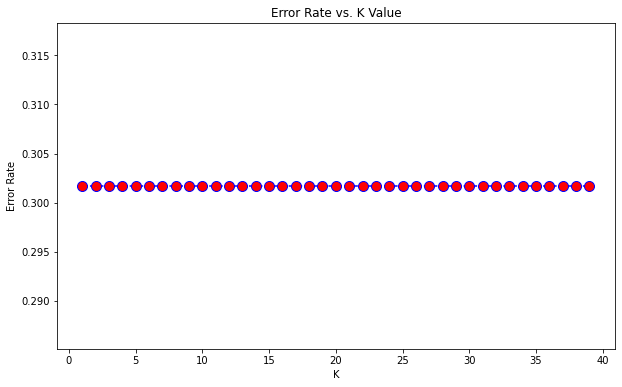

In [48]:
error_rate = []
for i in range(1,40):
 ada = AdaBoostClassifier(random_state = 10)
 ada.fit(X_train,y_train)
 pred_i = ada.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.6982758620689655 at K = 0


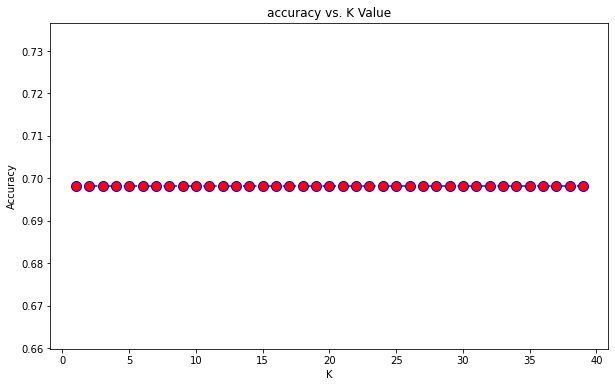

In [49]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    ada = AdaBoostClassifier(random_state = 10).fit(X_train,y_train)
    yhat = ada.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=seed)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=33)

In [51]:
scores = cross_val_score(gb, X, y, cv=3)
print(scores.mean())

0.5234375


In [52]:
y_pred = gb.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
confusion_mat = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix is : ", confusion_mat)
recall_show = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall_score is :", recall_show)
precision_show = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision Score is : ", precision_show)

Accuracy: 0.8189655172413793
Confusion matrix is :  [[42 13]
 [ 8 53]]
Recall_score is : 0.8189655172413793
Precision Score is :  0.8205590386624869


In [53]:
y_prediction_test = gb.predict(test_cases)
print("Predicted: ", y_prediction_test)
print("Expected: ", expected)

Predicted:  [1 0 0]
Expected:  [1, 1, 0]


In [54]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=384)
results = model_selection.cross_val_score(gb, X, y, cv=kfold)
print(results.mean())

0.7864583333333334


Minimum error:- 0.1810344827586207 at K = 0


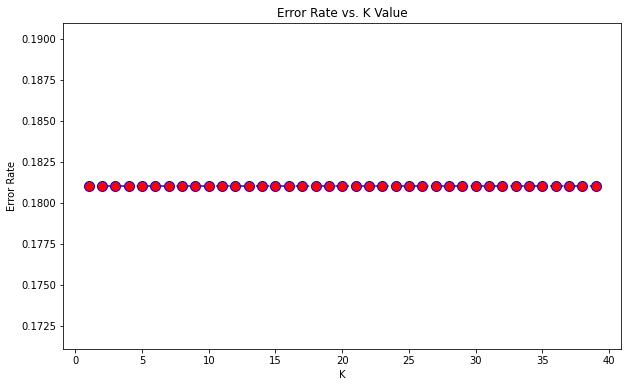

In [55]:
error_rate = []
for i in range(1,40):
 grd = GradientBoostingClassifier(random_state = 10)
 grd.fit(X_train,y_train)
 pred_i = grd.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8189655172413793 at K = 0


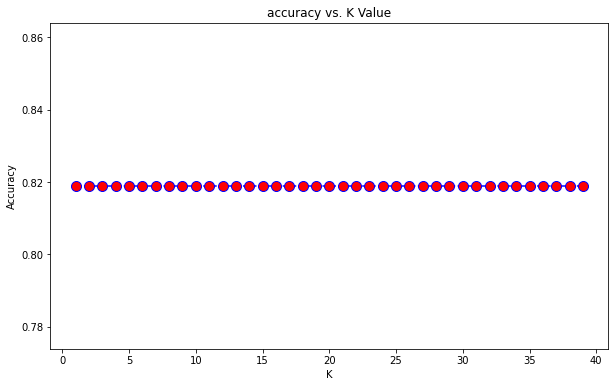

In [56]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    grd = GradientBoostingClassifier(random_state = 10).fit(X_train,y_train)
    yhat = grd.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))